# Лабораторная работа №1
###### Вариант 22

In [1]:
import sympy
import control as ct
import control.matlab as ctm
import matplotlib.pyplot as plt
import numpy as np

dt = 0.001 # Шаг моделирования

# Вспомогательные функции

Рассмотрим уравнение:
> $\dddot{y} + a_2\ddot y + a_1 \dot y + a_0 y = b_2 \ddot u + b_1 \dot u + b_0 u$

$a_3$ = 1, оставшиеся коэффициенты введем:

In [2]:
a2, a1, a0, b2, b1, b0 = 7, 4, 2, 5, 8, 1 # map(int, input().split())

# Задание 1

Зададим передаточную функцию:

In [3]:
w1 = ctm.tf((b2, b1, b0), (1, a2, a1, a0))
w1

TransferFunction(array([5, 8, 1]), array([1, 7, 4, 2]))

Зададим параметры моделирования. По условию задачи $u(t) = 1(t)$, начальные условия - нулевые.

In [4]:
sec = 30 # время в секундах
time = np.linspace(0, sec, int(sec/dt))
u1 = np.ones_like(time)
init_state = 0

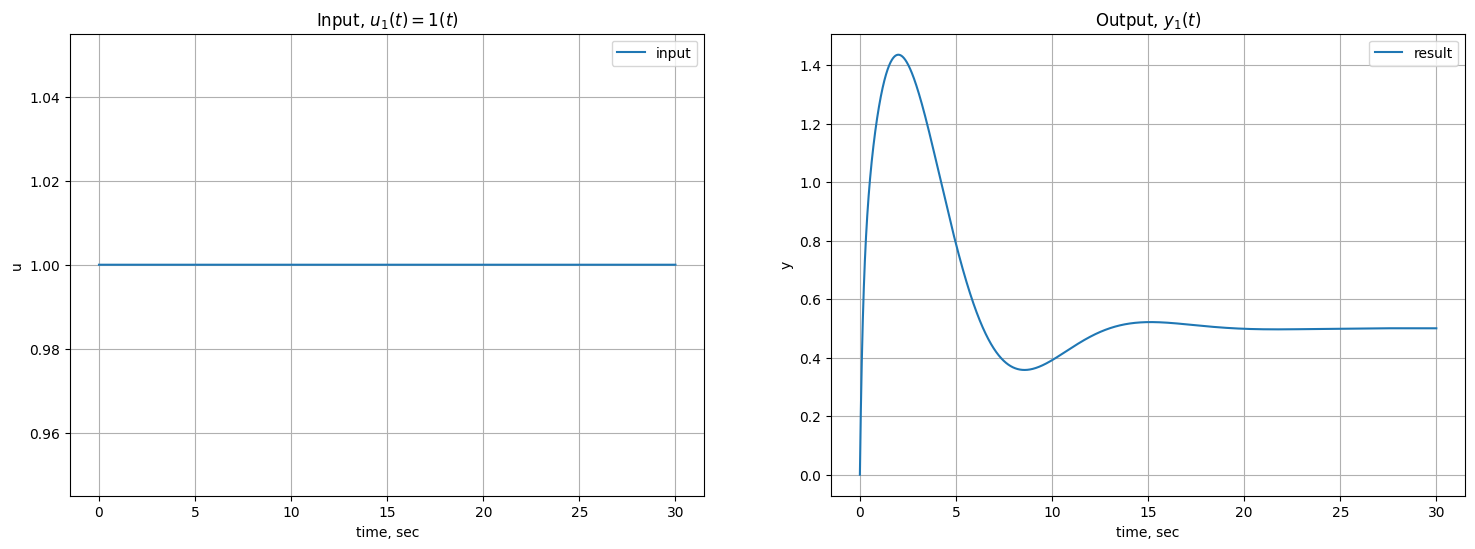

In [5]:
y1 = ct.forced_response(sys=w1,
                       T=time,
                       U=u1,
                       X0=init_state).outputs

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 6)

ax[0].plot(time, u1, label="input")
ax[0].set_title("Input, $u_1(t) = 1(t)$")
ax[0].set_xlabel("time, sec")
ax[0].set_ylabel("u")
ax[0].grid(True)
ax[0].legend()

ax[1].plot(time, y1, label="result")
ax[1].set_title("Output, $y_1(t)$")
ax[1].set_xlabel("time, sec")
ax[1].set_ylabel("y")
ax[1].grid(True)
ax[1].legend()

plt.show()

# Задание 2

Возьмем коэффициенты и передаточную функцию из предыдущего задания.

In [6]:
w2 = w1.copy()
u2 = u1
ss, _ = ct.canonical_form(
    ct.tf2ss(w2),
    form='reachable'
)
ss

StateSpace(array([[-7., -4., -2.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]]), array([[1.],
       [0.],
       [0.]]), array([[5., 8., 1.]]), array([[0.]]))

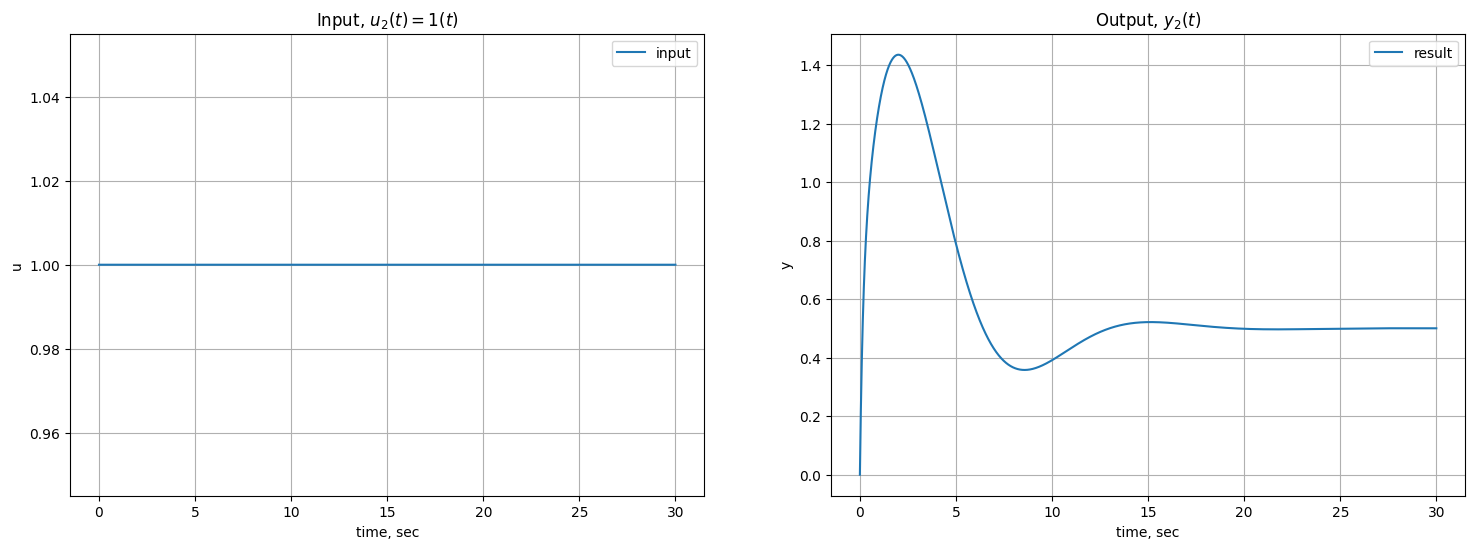

In [13]:
y2 = ct.forced_response(sys=ss,
                       T=time,
                       U=u2,
                       X0=init_state).outputs

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 6)

ax[0].plot(time, u2, label="input")
ax[0].set_title("Input, $u_2(t) = 1(t)$")
ax[0].set_xlabel("time, sec")
ax[0].set_ylabel("u")
ax[0].grid(True)
ax[0].legend()

ax[1].plot(time, y2, label="result")
ax[1].set_title("Output, $y_2(t)$")
ax[1].set_xlabel("time, sec")
ax[1].set_ylabel("y")
ax[1].grid(True)
ax[1].legend()

plt.show()

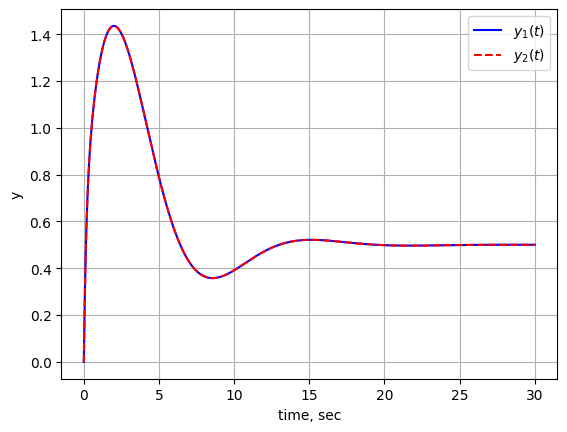

In [14]:
plt.plot(time, y1, "b", label="$y_1(t)$")
plt.plot(time, y2, "r", linestyle="dashed", label="$y_2(t)$")
plt.xlabel("time, sec")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

одинаковые графики

# Задание 3

$ A(p) y(t) = B(p) u(t) \Rightarrow y(t) = A^{-1} (p) B(p) u(t)$ \
$ A(p) = \begin{pmatrix} a_{11}(p) \ a_{12}(p) \\ a_{21}(p) \ a_{22}(p) \end{pmatrix}, B(p) = \begin{pmatrix} b_{11}(p) \ b_{12}(p) \\ b_{21}(p) \ b_{22}(p) \end{pmatrix}$

In [9]:
p = sympy.Symbol('p')

In [10]:
A = sympy.Matrix([
    [p + 12, p + 8],
    [p + 7, p + 3]
])
B = sympy.Matrix([
    [9, 5],
    [4, 1]
])

In [11]:
multi_w = (A.inv() @ B)
multi_w = sympy.together(multi_w)

In [12]:
multi_w

Matrix([
[(1 - p)/4, (-4*p - 7)/20],
[(p + 3)/4, (4*p + 23)/20]])

Система не реализуема. :(

# Задание 4

In [16]:
A = np.array([[0, -4],
             [1, -8]])
B = np.array([[1], [5]])
C = np.array([2, 6])
D = 0

In [17]:
ss4 = ct.ss(A, B, C, D)

In [18]:
sec = 30
time = np.linspace(0, sec, int(sec/dt))
u4 = np.ones_like(time)
init_state = 0

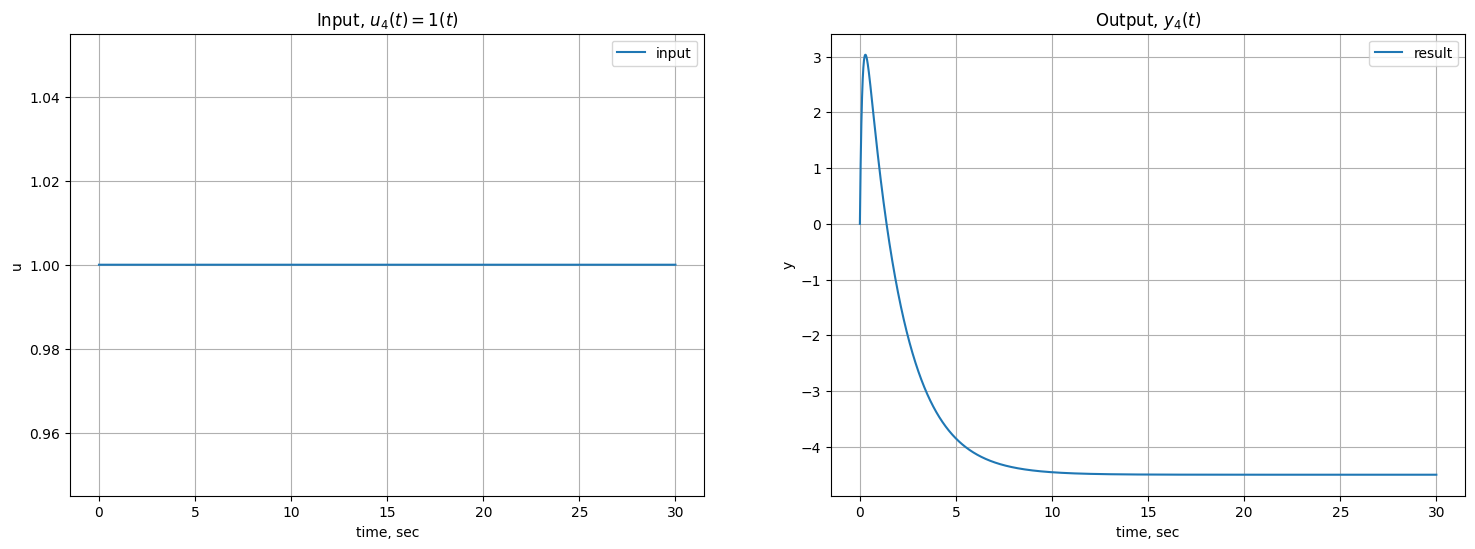

In [19]:
y4 = ct.forced_response(
    sys=ss4,
    T=time,
    U=u4,
    X0=init_state
).outputs

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 6)

ax[0].plot(time, u4, label="input")
ax[0].set_title("Input, $u_4(t) = 1(t)$")
ax[0].set_xlabel("time, sec")
ax[0].set_ylabel("u")
ax[0].grid(True)
ax[0].legend()

ax[1].plot(time, y4, label="result")
ax[1].set_title("Output, $y_4(t)$")
ax[1].set_xlabel("time, sec")
ax[1].set_ylabel("y")
ax[1].grid(True)
ax[1].legend()

plt.show()

# Задание 5

In [20]:
A = np.array([[0, -4],
              [1, -8]])
B = np.array([[4, 5],
             [2, 7]])
C = np.array([[2, 9],
              [0, 1]])
D = 0

In [21]:
ss5 = ct.ss(A, B, C, D)

In [22]:
sec = 25
time = np.linspace(0, sec, int(sec/dt))
u51 = np.ones_like(time)
u52 = 2*np.sin(time)
u5 = [u51, u52]
init_state = [0, 0]

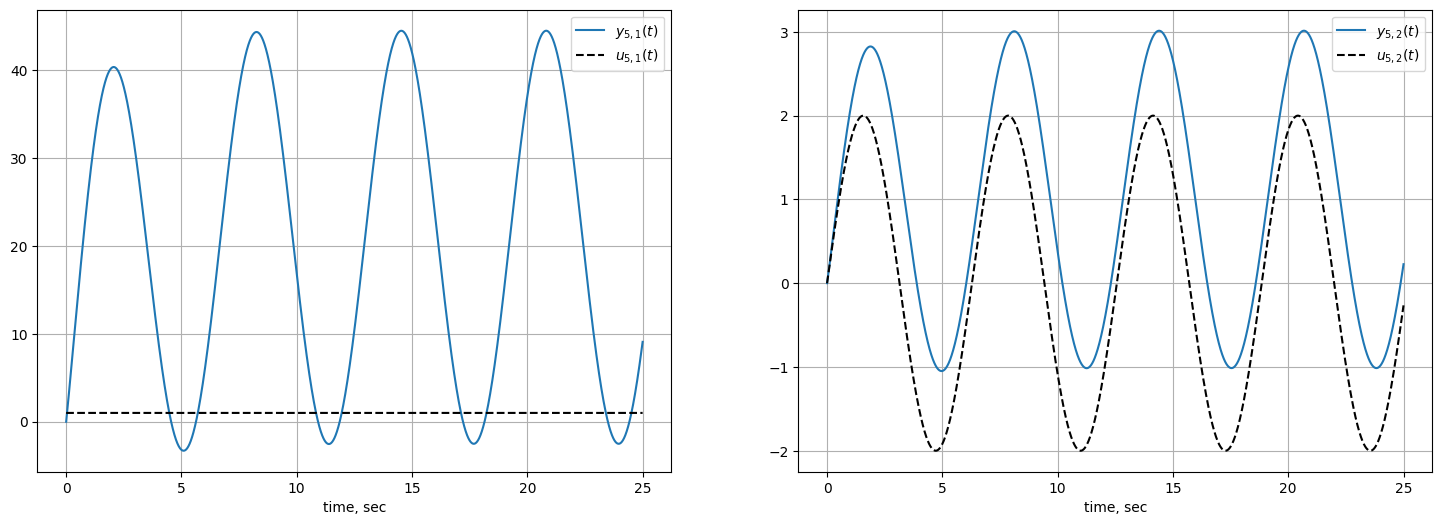

In [24]:
y5 = ct.forced_response(
    sys=ss5,
    T=time,
    U=u5,
    X0=init_state
).outputs

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 6)

ax[0].plot(time, y5[0], label="$y_{5,1}(t)$")
ax[0].plot(time, u5[0], color='k', linestyle='dashed', label = "$u_{5,1}(t)$")
ax[0].set_xlabel("time, sec")
ax[0].legend()
ax[0].grid(True)

ax[1].plot(time, y5[1], label="$y_{5,2}(t)$")
ax[1].plot(time, u5[1], color='k', linestyle='dashed', label="$u_{5,2}(t)$")
ax[1].set_xlabel("time, sec")
ax[1].legend()
ax[1].grid(True)

plt.show()